<a href="https://colab.research.google.com/github/Khoa22213131/AIO-2024_HOMEWORK/blob/feature%2Fmodule_03%2Fweek_05%2Fproject/M03W05_Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown 1zOj808OstnkaWlltM4qKNjjT3iT3yeMN

Downloading...
From: https://drive.google.com/uc?id=1zOj808OstnkaWlltM4qKNjjT3iT3yeMN
To: /content/cleveland.csv
100% 10.9k/10.9k [00:00<00:00, 35.4MB/s]


<ipython-input-2-7fb11129d7fc>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot ( df [ df . target == 0 ] . age , label = '0' )
<ipython-input-2-7fb11129d7fc>:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns . distplot ( df [ df . target == 1 ] . age , label = '1' )


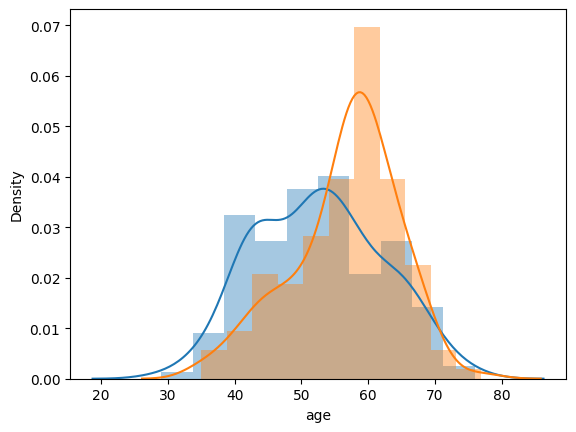

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib . pyplot as plt
import seaborn as sns
# Bai tap 1
df = pd . read_csv ('cleveland.csv', header = None )
df . columns = ['age','sex','cp','trestbps','chol',
              'fbs','restecg','thalach','exang',
              'oldpeak','slope','ca','thal','target']
df ['target'] = df . target . map ({0: 0 , 1: 1 , 2: 1 , 3: 1 , 4: 1})
df ['thal'] = df . thal . fillna ( df . thal . mean () )
df ['ca'] = df . ca . fillna ( df . ca . mean () )
# distribution of target vs age
sns . distplot ( df [ df . target == 0 ] . age , label = '0' )
sns . distplot ( df [ df . target == 1 ] . age , label = '1' )

# Your code here *******************************
plt . show ()

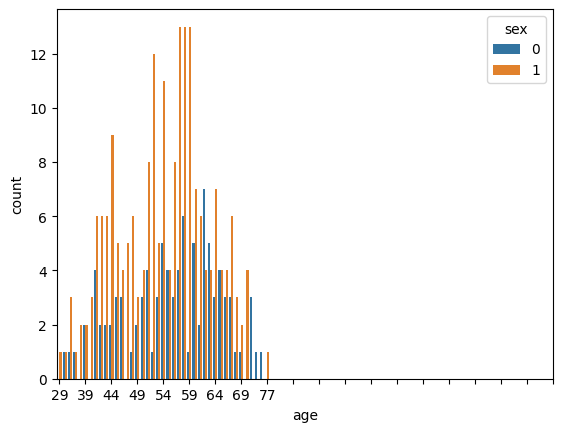

In [6]:
# barplot of age vs sex with hue =
sns . countplot ( x = 'age' , hue = 'sex' , data = df )
plt . xticks ( np . arange ( 0 , 100 , 5 ) )
# Your code here *********************************
plt . show ()

In [11]:
from sklearn . model_selection import train_test_split
X = df . iloc [: , : -1]. values
y = df . iloc [: , -1]. values
X_train , X_test , y_train , y_test = train_test_split (X , y , test_size = 0.2 ,
random_state = 42)

#knn
from sklearn . neighbors import KNeighborsClassifier
from sklearn . metrics import confusion_matrix
knn = KNeighborsClassifier ( n_neighbors=5,
weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski' )
knn . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , knn . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , knn . predict ( X_test ) )

In [12]:
print ()
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for KNeighborsClassifier = {} '. format (
accuracy_for_train ) )
print ('Accuracy for test set for KNeighborsClassifier = {} '. format ( accuracy_for_test))



Accuracy for training set for KNeighborsClassifier = 0.76 
Accuracy for test set for KNeighborsClassifier = 0.69 


In [18]:
# your code here ***************************
#svm
from sklearn . svm import SVC
from sklearn . metrics import confusion_matrix
nb = SVC ( kernel = 'rbf',
random_state=42 )
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
print ()
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for SVM = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for SVM = {} '. format ( accuracy_for_test ) )


Accuracy for training set for SVM = 0.66 
Accuracy for test set for SVM = 0.67 


In [20]:
# your code here ***************************
#naive bayes
from sklearn . naive_bayes import GaussianNB
from sklearn . metrics import confusion_matrix
nb = GaussianNB ()
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
print ()
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Naive Bayes = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for Naive Bayes = {} '. format ( accuracy_for_test ) )


Accuracy for training set for Naive Bayes = 0.85 
Accuracy for test set for Naive Bayes = 0.84 


In [21]:
# your code here ***************************
#decision tree
from sklearn . metrics import confusion_matrix
from sklearn . tree import DecisionTreeClassifier
nb = DecisionTreeClassifier ( criterion='gini', max_depth=10, min_samples_split=2 )
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
print ()
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Decision Tree = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for Decision Tree = {} '. format ( accuracy_for_test ) )


Accuracy for training set for Naive Bayes = 1.0 
Accuracy for test set for Naive Bayes = 0.75 


In [22]:
# your code here ***************************
#random forrest
from sklearn . metrics import confusion_matrix
from sklearn . ensemble import RandomForestClassifier
nb = RandomForestClassifier ( criterion='gini', max_depth=10, min_samples_split=2, n_estimators = 10, random_state=42 )
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
print ()
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for Random Forest = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for Random Forest = {} '. format ( accuracy_for_test ) )


Accuracy for training set for Naive Bayes = 0.98 
Accuracy for test set for Naive Bayes = 0.8 


In [23]:
from sklearn . metrics import confusion_matrix
from sklearn . ensemble import AdaBoostClassifier
nb = AdaBoostClassifier (n_estimators=50, learning_rate=1.0)
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,2)
print ('Accuracy for training set for AdaBoost = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for AdaBoost = {} '. format ( accuracy_for_test ) )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.91 
Accuracy for test set for AdaBoost = 0.84 


In [25]:
#Gradient boost
from sklearn . metrics import confusion_matrix
from sklearn . ensemble import GradientBoostingClassifier
nb = GradientBoostingClassifier (learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3,
random_state=42)
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,
                                 2)
print ('Accuracy for training set for GradientBoost = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for GradientBoost = {} '. format ( accuracy_for_test ) )

Accuracy for training set for GradientBoost = 1.0 
Accuracy for test set for GradientBoost = 0.85 


In [34]:
#xgboost
from sklearn . metrics import confusion_matrix
from xgboost import XGBClassifier
nb = XGBClassifier (objective="binary:logistic", random_state=42, n_estimators = 100)
nb . fit ( X_train , y_train )
cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,
                                 2)
print ('Accuracy for training set for xgboost = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for xgboost = {} '. format ( accuracy_for_test ) )

Accuracy for training set for xgboost = 1.0 
Accuracy for test set for xgboost = 0.87 


In [37]:
#stacking
from sklearn . metrics import confusion_matrix
from sklearn . ensemble import StackingClassifier
from sklearn . linear_model import LogisticRegression
from sklearn . svm import SVC
from sklearn . tree import DecisionTreeClassifier
from sklearn . ensemble import RandomForestClassifier
from sklearn . neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn . ensemble import GradientBoostingClassifier
from sklearn . ensemble import AdaBoostClassifier
import numpy as np

dtc = DecisionTreeClassifier ( random_state =42)
rfc = RandomForestClassifier ( random_state =42)
knn = KNeighborsClassifier ()
xgb = XGBClassifier ()
gc = GradientBoostingClassifier ( random_state =42)
svc = SVC ( kernel = 'rbf', random_state =42)
ad = AdaBoostClassifier ( random_state =42)

#stacking heterogeneous approach
estimators = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]
nb = StackingClassifier ( estimators = estimators, final_estimator = LogisticRegression () )
nb . fit ( X_train , y_train )

cm_train = confusion_matrix ( y_train , nb . predict ( X_train ) )
cm_test = confusion_matrix ( y_test , nb . predict ( X_test ) )
accuracy_for_train = np . round (( cm_train [0][0] + cm_train [1][1]) /len( y_train ) ,2)
accuracy_for_test = np . round (( cm_test [0][0] + cm_test [1][1]) /len( y_test ) ,
                                 2)
print ('Accuracy for training set for Stacking = {} '. format ( accuracy_for_train ) )
print ('Accuracy for test set for Stacking = {} '. format ( accuracy_for_test ) )

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 1.0 
Accuracy for test set for Stacking = 0.89 
